In [3]:
# Imported Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
# Other Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [100]:
#讀取資料
df = pd.read_csv('/Users/yuta_mac/Desktop/CreditCardFraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 ## scale Amount and Time

In [4]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [5]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Without Sampling and Splitting the Data

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
#看看目標特徵中不同類別的比例
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
#分開不同類別
X = df.drop('Class', axis=1)
y = df['Class']
#繼承sk-learn中提供的對數據集進行洗牌並分割函數，抽出五組
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
#使用sss的split功能，分割出五組「訓練跟測試集」
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
# 將第五組轉換成Array(_ws = Without Sampling)
Xtrain_ws = original_Xtrain.values
Xtest_ws = original_Xtest.values
ytrain_ws = original_ytrain.values
ytest_ws = original_ytest.values
Xtrain_ws.shape

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


(227845, 30)

## Random Under-Sampling

In [118]:
# 先洗牌 Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)
# 492筆有詐欺＋抽492筆無詐欺
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
#有詐欺合併無詐欺
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# 再洗牌
new_df = normal_distributed_df.sample(frac=1, random_state=42)
#分割
X = new_df.drop('Class', axis=1)
y = new_df['Class']
from sklearn.model_selection import train_test_split
Xtrain_us, Xtest_us, ytrain_us, ytest_us = train_test_split(X, y, test_size=0.2, random_state=42)
Xtrain_us.shape

(787, 30)

## OverSampling

In [105]:
# OverSampling 使用 SMOTE 方法
sm = SMOTE(ratio='minority', random_state=42)
# 使用sm.fit_sample方法，將original_Xtrain, original_ytrain中的資料，系統性地合成不平衡特徵
Xtrain_os, ytrain_os = sm.fit_sample(original_Xtrain, original_ytrain)
Xtest_os, ytest_os = original_Xtest, original_ytest
Xtrain_os.shape

(454902, 30)

# ----Training-----

## Train without Sampling¶

In [191]:
# Let's implement simple classifiers

classifiers_ws = {
    "LogisiticRegression_ws": LogisticRegression(),
    "KNearest_ws": KNeighborsClassifier(),
    "Support Vector Classifier_ws": SVC(),
    "DecisionTreeClassifier_ws": DecisionTreeClassifier()
}


In [ ]:
# stop

In [192]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score

#sklearn库的Cross Validation
#https://blog.csdn.net/Dream_angel_Z/article/details/47048285
for key, classifier in classifiers_ws.items():
    classifier.fit(Xtrain_ws, ytrain_ws)
    training_score = cross_val_score(classifier, Xtrain_ws, ytrain_ws, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 5) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 99.893 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 99.834 % accuracy score
Classifiers:  SVC Has a training score of 99.834 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 99.909 % accuracy score


In [ ]:
# stop

## Train in Random Under-Sampling¶

In [63]:
# Let's implement simple classifiers

classifiers_us = {
    "LogisiticRegression_us": LogisticRegression(),
    "KNearest_us": KNeighborsClassifier(),
    "Support Vector Classifier_us": SVC(),
    "DecisionTreeClassifier_us": DecisionTreeClassifier()
}


In [175]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score

#sklearn库的Cross Validation
#https://blog.csdn.net/Dream_angel_Z/article/details/47048285
for key, classifier in classifiers_us.items():
    classifier.fit(Xtrain_us, ytrain_us)
    training_score = cross_val_score(classifier, Xtrain_us, ytrain_us, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 4) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 92.51 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 66.33 % accuracy score
Classifiers:  SVC Has a training score of 55.02 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.36 % accuracy score


## Train in OverSampling¶

In [160]:
# Let's implement simple classifiers

classifiers_os = {
    "LogisiticRegression_os": LogisticRegression(),
    "KNearest_os": KNeighborsClassifier(),
    "Support Vector Classifier_os": SVC(),
    "DecisionTreeClassifier_os": DecisionTreeClassifier()
}

In [ ]:
# stop

In [80]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers_os.items():
    classifier.fit(Xtrain_os, ytrain_os)
    training_score = cross_val_score(classifier, Xtrain_os, ytrain_os, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 8) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.179181 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 99.89865999999999 % accuracy score
Classifiers:  SVC Has a training score of 99.894922 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 99.828754 % accuracy score


In [ ]:
# stop

In [170]:
classifiers_os["LogisiticRegression_os"] = classifiers["LogisiticRegression"]
classifiers_os["KNearest_os"] = classifiers["KNearest"]
classifiers_os["Support Vector Classifier_os"] = classifiers["Support Vector Classifier"]
classifiers_os["DecisionTreeClassifier_os"] = classifiers["DecisionTreeClassifier"]

# ----Testing----

## Testing without Sampling¶

(56962,)

In [184]:
print(y_pred_log_reg[1:200])
print(y_pred_knear[1:200])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
#Prediction
y_pred_log_reg_ws = classifiers_ws['LogisiticRegression_ws'].predict(Xtrain_ws)
y_pred_knear_ws = classifiers_ws['KNearest_ws'].predict(Xtest_ws)
y_pred_svc_ws = classifiers_ws['Support Vector Classifier_ws'] .predict(Xtest_ws)
y_pred_tree_ws = classifiers_ws['DecisionTreeClassifier_ws'].predict(Xtest_ws)

#confusion matrix
log_reg_cm_ws = confusion_matrix(ytrain_ws, y_pred_log_reg_ws)
kneighbors_cm_ws = confusion_matrix(ytest_ws, y_pred_knear_ws)
svc_cm_ws = confusion_matrix(ytest_ws, y_pred_svc_ws)
tree_cm_ws = confusion_matrix(ytest_ws, y_pred_tree_ws)

# 畫出最理想的Confusion matrix，方便對照
actual_cm_ws = confusion_matrix(ytest_ws, ytest_ws)
labels = ['No Fraud', 'Fraud']
fig = plt.figure(figsize=(12,12))
#畫圖
fig.add_subplot(321)
plot_confusion_matrix(actual_cm_ws, labels, title="actual_cm", cmap=plt.cm.Greens)
fig.add_subplot(323)
plot_confusion_matrix(log_reg_cm_ws, labels, title="log_reg_cm", cmap=plt.cm.Greens)
fig.add_subplot(324)
plot_confusion_matrix(kneighbors_cm_ws, labels, title="kneighbors_cm", cmap=plt.cm.Greens)
fig.add_subplot(325)
plot_confusion_matrix(svc_cm_ws, labels, title="svc_cm", cmap=plt.cm.Greens)
fig.add_subplot(326)
plot_confusion_matrix(tree_cm_ws, labels, title="tree_cm", cmap=plt.cm.Greens)


## Testing in Under-Sampling¶

Confusion matrix, without normalization
[[ 87   0]
 [  0 110]]
Confusion matrix, without normalization
[[ 84   3]
 [  6 104]]
Confusion matrix, without normalization
[[50 37]
 [38 72]]
Confusion matrix, without normalization
[[ 87   0]
 [104   6]]
Confusion matrix, without normalization
[[ 81   6]
 [  7 103]]


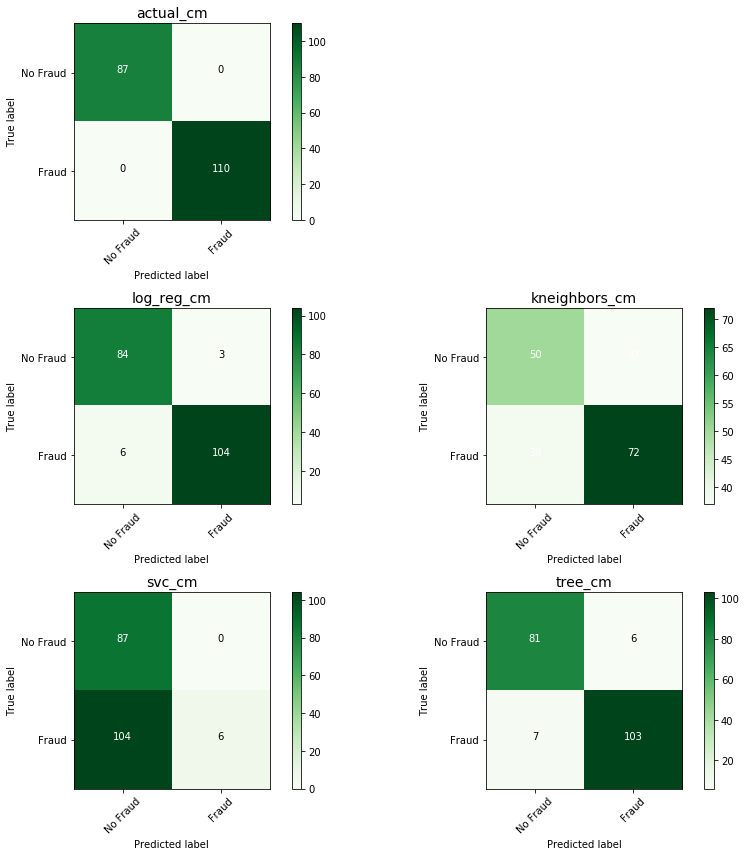

In [177]:
y_pred_log_reg_us = classifiers_us['LogisiticRegression_us'].predict(Xtest_us)
y_pred_knear_us = classifiers_us['KNearest_us'].predict(Xtest_us)
y_pred_svc_us = classifiers_us['Support Vector Classifier_us'] .predict(Xtest_us)
y_pred_tree_us = classifiers_us['DecisionTreeClassifier_us'].predict(Xtest_us)

log_reg_cm_us = confusion_matrix(ytest_us, y_pred_log_reg_us)
kneighbors_cm_us = confusion_matrix(ytest_us, y_pred_knear_us)
svc_cm_us = confusion_matrix(ytest_us, y_pred_svc_us)
tree_cm_us = confusion_matrix(ytest_us, y_pred_tree_us)

#畫出最理想的Confusion matrix，方便對照
actual_cm_us = confusion_matrix(ytest_us, ytest_us)
labels = ['No Fraud', 'Fraud']
fig = plt.figure(figsize=(12,12))
#畫圖
fig.add_subplot(321)
plot_confusion_matrix(actual_cm_us, labels, title="actual_cm", cmap=plt.cm.Greens)
fig.add_subplot(323)
plot_confusion_matrix(log_reg_cm_us, labels, title="log_reg_cm", cmap=plt.cm.Greens)
fig.add_subplot(324)
plot_confusion_matrix(kneighbors_cm_us, labels, title="kneighbors_cm", cmap=plt.cm.Greens)
fig.add_subplot(325)
plot_confusion_matrix(svc_cm_us, labels, title="svc_cm", cmap=plt.cm.Greens)
fig.add_subplot(326)
plot_confusion_matrix(tree_cm_us, labels, title="tree_cm", cmap=plt.cm.Greens)


## Testing in OverSampling

Confusion matrix, without normalization
[[56864     0]
 [    0    98]]
Confusion matrix, without normalization
[[55615  1249]
 [    7    91]]
Confusion matrix, without normalization
[[56790    74]
 [    4    94]]
Confusion matrix, without normalization
[[56784    80]
 [    9    89]]
Confusion matrix, without normalization
[[55615  1249]
 [    7    91]]


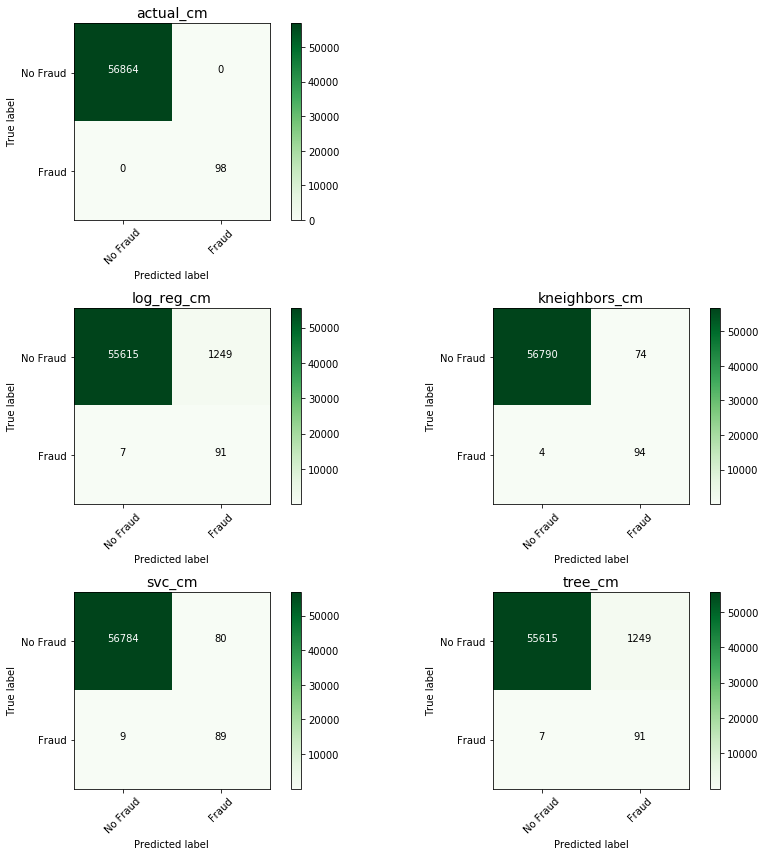

In [171]:
y_pred_log_reg_os = classifiers_os['LogisiticRegression_os'].predict(Xtest_os)
y_pred_knear_os = classifiers_os['KNearest_os'].predict(Xtest_os)
y_pred_svc_os = classifiers_os['Support Vector Classifier_os'] .predict(Xtest_os)
y_pred_tree_os = classifiers_os['LogisiticRegression_os'].predict(Xtest_os)

log_reg_cm_os = confusion_matrix(ytest_os, y_pred_log_reg_os)
kneighbors_cm_os = confusion_matrix(ytest_os, y_pred_knear_os)
svc_cm_os = confusion_matrix(ytest_os, y_pred_svc_os)
tree_cm_os = confusion_matrix(ytest_os, y_pred_tree_os)

#畫出最理想的Confusion matrix，方便對照
actual_cm_os = confusion_matrix(ytest_ws, ytest_ws)
labels = ['No Fraud', 'Fraud']
fig = plt.figure(figsize=(12,12))

#畫圖
fig.add_subplot(321)
plot_confusion_matrix(actual_cm_os, labels, title="actual_cm", cmap=plt.cm.Greens)
fig.add_subplot(323)
plot_confusion_matrix(log_reg_cm_os, labels, title="log_reg_cm", cmap=plt.cm.Greens)
fig.add_subplot(324)
plot_confusion_matrix(kneighbors_cm_os, labels, title="kneighbors_cm", cmap=plt.cm.Greens)
fig.add_subplot(325)
plot_confusion_matrix(svc_cm_os, labels, title="svc_cm", cmap=plt.cm.Greens)
fig.add_subplot(326)
plot_confusion_matrix(tree_cm_os, labels, title="tree_cm", cmap=plt.cm.Greens)


In [ ]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test_ws, y_pred_log_reg_ws))
print(classification_report(y_test_us, y_pred_log_reg_us))
print(classification_report(y_test_os, y_pred_log_reg_os))

print('KNears Neighbors:')
print(classification_report(y_test_ws, y_pred_knear_ws))
print(classification_report(y_test_us, y_pred_knear_us))
print(classification_report(y_test_os, y_pred_knear_os))

print('Support Vector Classifier:')
print(classification_report(y_test_ws, y_pred_svc_ws))
print(classification_report(y_test_us, y_pred_svc_us))
print(classification_report(y_test_os, y_pred_svc_os))

print('Support Vector Classifier:')
print(classification_report(y_test_ws, y_pred_tree_ws))
print(classification_report(y_test_us, y_pred_tree_us))
print(classification_report(y_test_os, y_pred_tree_os))

# ----Neural Networks----

## Without Sampling

In [78]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = Xtrain_ws.shape[1]

nn_model_ws = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
nn_model_ws.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train on 363921 samples, validate on 90981 samples
Epoch 1/20
 - 2s - loss: 0.0862 - acc: 0.9697 - val_loss: 0.0326 - val_acc: 0.9917
Epoch 2/20
 - 1s - loss: 0.0161 - acc: 0.9962 - val_loss: 0.0085 - val_acc: 0.9997
Epoch 3/20
 - 1s - loss: 0.0085 - acc: 0.9981 - val_loss: 0.0039 - val_acc: 0.9999
Epoch 4/20
 - 1s - loss: 0.0056 - acc: 0.9988 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 5/20
 - 1s - loss: 0.0046 - acc: 0.9990 - val_loss: 0.0025 - val_acc: 0.9997
Epoch 6/20
 - 2s - loss: 0.0037 - acc: 0.9992 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 7/20
 - 1s - loss: 0.0032 - acc: 0.9993 - val_loss: 0.0036 - val_acc: 0.9995
Epoch 8/20
 - 1s - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0010 - val_acc: 0.9999
Epoch 9/20
 - 1s - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0023 - val_acc: 0.9997
Epoch 10/20
 - 1s - loss: 0.0022 - acc: 0.9995 - val_loss: 9.3534e-04 - val_acc: 1.0000
Epoch 11/20
 - 1s - loss: 0.0022 - acc: 0.9996 - val_loss: 6.1424e-04 - val_acc: 1.0000
Epoch 12/20
 - 1s - loss: 

In [193]:
nn_model_ws.fit(Xtrain_ws, ytrain_ws, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)
nn_predictions_ws = nn_model_ws.predict(Xtest_ws, batch_size=200, verbose=0)
nn_fraud_predictions_ws = nn_model_ws.predict_classes(Xtest_ws, batch_size=200, verbose=0)
nn_cm_ws = confusion_matrix(ytest_ws, nn_fraud_predictions_ws)
nn_actual_cm = confusion_matrix(ytest_ws, ytest_ws)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(nn_cm_ws, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(nn_actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

NameError: name 'nn_model_ws' is not defined

## undersample

In [74]:
n_inputs = Xtrain_us.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
undersample_model.summary()


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [87]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
undersample_model.fit(Xtrain_us, ytrain_us, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)
undersample_predictions = undersample_model.predict(Xtest_us, batch_size=200, verbose=0)
undersample_fraud_predictions = undersample_model.predict_classes(Xtest_us, batch_size=200, verbose=0)

Train on 629 samples, validate on 158 samples
Epoch 1/20
 - 0s - loss: 0.0920 - acc: 0.9634 - val_loss: 0.1401 - val_acc: 0.9684
Epoch 2/20
 - 0s - loss: 0.0848 - acc: 0.9730 - val_loss: 0.1520 - val_acc: 0.9747
Epoch 3/20
 - 0s - loss: 0.0787 - acc: 0.9730 - val_loss: 0.1548 - val_acc: 0.9747
Epoch 4/20
 - 0s - loss: 0.0741 - acc: 0.9746 - val_loss: 0.1593 - val_acc: 0.9684
Epoch 5/20
 - 0s - loss: 0.0709 - acc: 0.9777 - val_loss: 0.1618 - val_acc: 0.9684
Epoch 6/20
 - 0s - loss: 0.0681 - acc: 0.9793 - val_loss: 0.1640 - val_acc: 0.9684
Epoch 7/20
 - 0s - loss: 0.0650 - acc: 0.9793 - val_loss: 0.1645 - val_acc: 0.9684
Epoch 8/20
 - 0s - loss: 0.0618 - acc: 0.9793 - val_loss: 0.1670 - val_acc: 0.9684
Epoch 9/20
 - 0s - loss: 0.0593 - acc: 0.9825 - val_loss: 0.1716 - val_acc: 0.9684
Epoch 10/20
 - 0s - loss: 0.0562 - acc: 0.9825 - val_loss: 0.1735 - val_acc: 0.9684
Epoch 11/20
 - 0s - loss: 0.0537 - acc: 0.9793 - val_loss: 0.1801 - val_acc: 0.9684
Epoch 12/20
 - 0s - loss: 0.0512 - acc:

In [88]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 83   4]
 [  4 106]]
Confusion matrix, without normalization
[[ 87   0]
 [  0 110]]


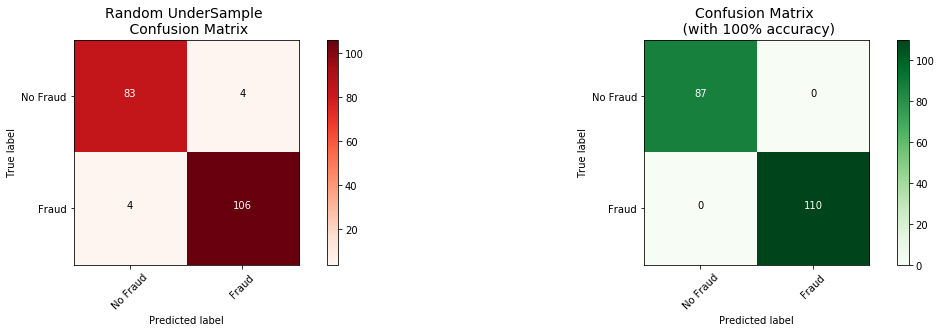

In [89]:
undersample_cm = confusion_matrix(ytest_us, undersample_fraud_predictions)
actual_cm = confusion_matrix(ytest_us, ytest_us)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)
fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)


## OverSampling

In [78]:
n_inputs = Xtrain_os.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train on 363921 samples, validate on 90981 samples
Epoch 1/20
 - 2s - loss: 0.0862 - acc: 0.9697 - val_loss: 0.0326 - val_acc: 0.9917
Epoch 2/20
 - 1s - loss: 0.0161 - acc: 0.9962 - val_loss: 0.0085 - val_acc: 0.9997
Epoch 3/20
 - 1s - loss: 0.0085 - acc: 0.9981 - val_loss: 0.0039 - val_acc: 0.9999
Epoch 4/20
 - 1s - loss: 0.0056 - acc: 0.9988 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 5/20
 - 1s - loss: 0.0046 - acc: 0.9990 - val_loss: 0.0025 - val_acc: 0.9997
Epoch 6/20
 - 2s - loss: 0.0037 - acc: 0.9992 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 7/20
 - 1s - loss: 0.0032 - acc: 0.9993 - val_loss: 0.0036 - val_acc: 0.9995
Epoch 8/20
 - 1s - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0010 - val_acc: 0.9999
Epoch 9/20
 - 1s - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0023 - val_acc: 0.9997
Epoch 10/20
 - 1s - loss: 0.0022 - acc: 0.9995 - val_loss: 9.3534e-04 - val_acc: 1.0000
Epoch 11/20
 - 1s - loss: 0.0022 - acc: 0.9996 - val_loss: 6.1424e-04 - val_acc: 1.0000
Epoch 12/20
 - 1s - loss: 

Train on 157 samples, validate on 40 samples
Epoch 1/20
 - 0s - loss: 0.5200 - acc: 0.9618 - val_loss: 2.8414e-05 - val_acc: 1.0000
Epoch 2/20
 - 0s - loss: 0.5184 - acc: 0.9682 - val_loss: 2.1346e-05 - val_acc: 1.0000
Epoch 3/20
 - 0s - loss: 0.5163 - acc: 0.9682 - val_loss: 1.6039e-05 - val_acc: 1.0000
Epoch 4/20
 - 0s - loss: 0.5148 - acc: 0.9682 - val_loss: 1.2975e-05 - val_acc: 1.0000
Epoch 5/20
 - 0s - loss: 0.5140 - acc: 0.9682 - val_loss: 1.1527e-05 - val_acc: 1.0000
Epoch 6/20
 - 0s - loss: 0.5137 - acc: 0.9682 - val_loss: 1.1127e-05 - val_acc: 1.0000
Epoch 7/20
 - 0s - loss: 0.5135 - acc: 0.9682 - val_loss: 1.1434e-05 - val_acc: 1.0000
Epoch 8/20
 - 0s - loss: 0.5134 - acc: 0.9682 - val_loss: 1.2178e-05 - val_acc: 1.0000
Epoch 9/20
 - 0s - loss: 0.5134 - acc: 0.9682 - val_loss: 1.3239e-05 - val_acc: 1.0000
Epoch 10/20
 - 0s - loss: 0.5134 - acc: 0.9682 - val_loss: 1.4522e-05 - val_acc: 1.0000
Epoch 11/20
 - 0s - loss: 0.5133 - acc: 0.9682 - val_loss: 1.5970e-05 - val_acc: 1.0

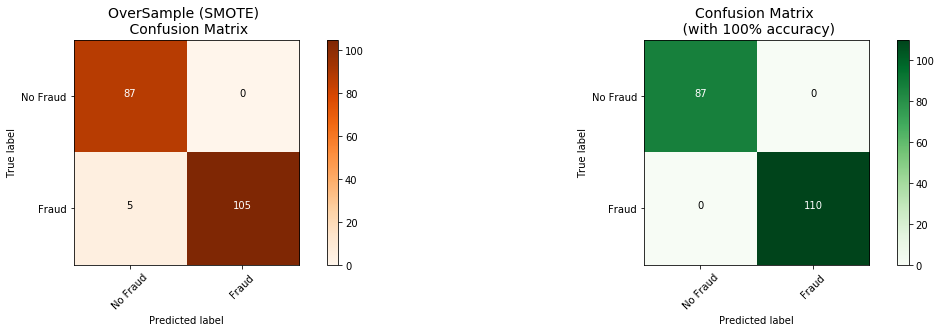

In [90]:
oversample_model.fit(Xtrain_os, ytrain_os, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)
oversample_predictions = oversample_model.predict(Xtest_os, batch_size=200, verbose=0)
oversample_fraud_predictions = oversample_model.predict_classes(Xtest_os, batch_size=200, verbose=0)
oversample_smote = confusion_matrix(ytest_os, oversample_fraud_predictions)
actual_cm = confusion_matrix(ytest_os, ytest_os)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)